# Undirected Graph

In [4]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


class node():
    def __init__(self, name):
        self.name = name
        self.neighbors = []
        self.visited = False
        self.prev = None  
        
    def neighbors_name(self):
        """
        info about neighbors names
        """
        return [node_s.name for node_s in self.neighbors]
    
    def reset(self):
        self.visited = False
        self.prev = None    
        
class graph():
    def __init__(self, elist):
        """
            self.nodes is a dictionary
                key   : node name
                value : node class
        """
        self.elist = elist
        self.node_names = list(set([s for s,t in elist] + [t for s,t in elist]))
        self.nodes = {s:node(s) for s in self.node_names}
        
        self.create_graph()
      
    def reset(self):
        for node_name in self.node_names:
            self.nodes[node_name].reset()
    
    def add_edge(self, s,t):
        """Undirected Edge"""
        self.nodes[s].neighbors.append(self.nodes[t])
        self.nodes[t].neighbors.append(self.nodes[s])
    
    def create_graph(self):
        for s,t in self.elist:
             self.add_edge(s,t)
                
    def info(self):
        return {s:node_s.neighbors_name() for s,node_s in self.nodes.items()}
    
    def draw(self, color = 'lightblue'):
        """
            Usage of networkx for visualisation
        """
        G = nx.Graph()
        G.add_edges_from(self.elist)
        plt.figure(figsize=(20,10))
        nx.draw(G, node_size=1000, font_size= 30, node_color=color, with_labels=True)
             

{'A': ['B', 'C', 'E'],
 'B': ['A', 'C'],
 'C': ['A', 'D', 'B'],
 'D': ['C', 'E', 'F'],
 'E': ['D', 'A'],
 'F': ['D']}

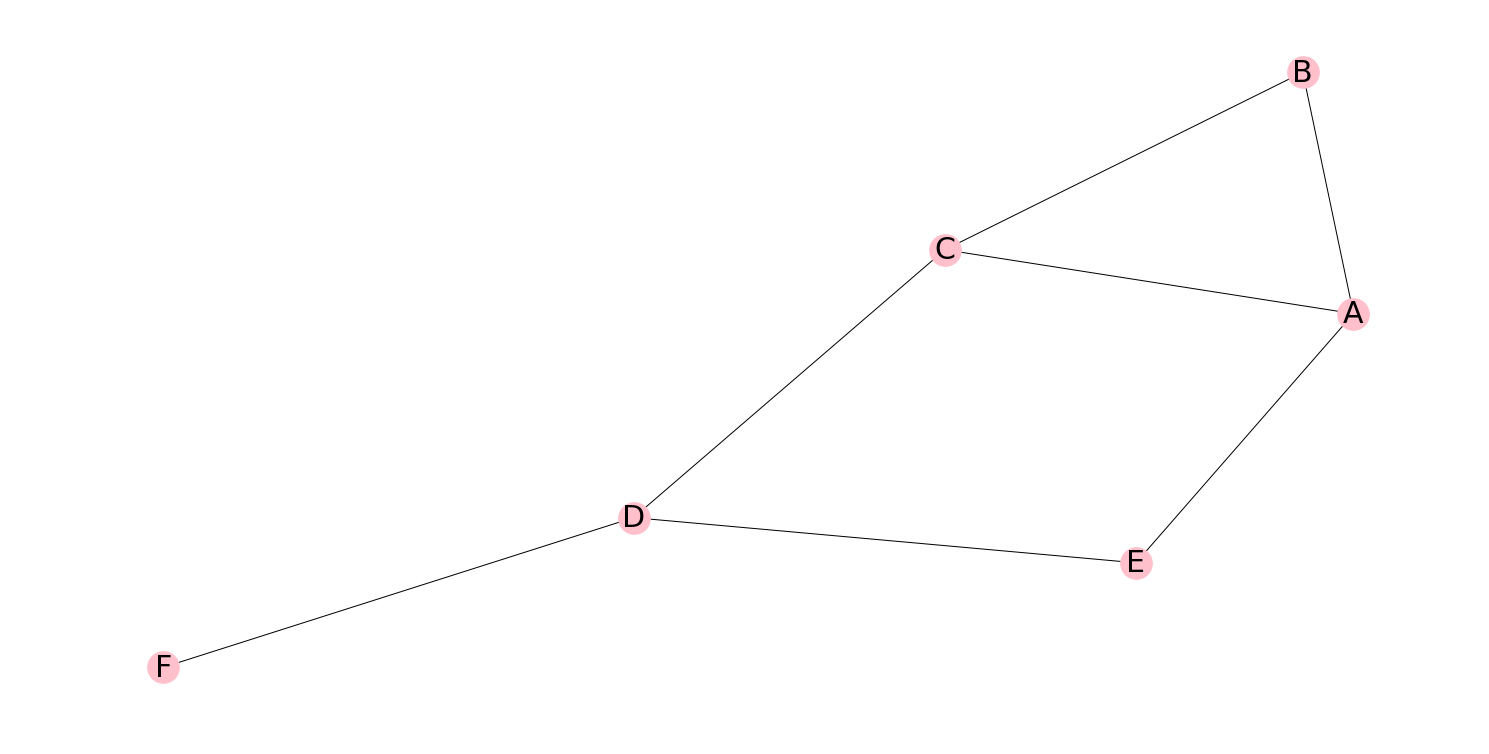

In [5]:
elist = [('A', 'B'), ('A', 'C'), ('C', 'D'), ('C', 'B'), ('E', 'D'), ('F', 'D'), ('A', 'E')]
G = graph(elist)
G.draw('pink')
G.info()

# Graph Traversal DFS algorithm

In [6]:
class RecursiveDepthFirstSearch():   
    def __init__(self, G):
        self.G = G
        self.traversal = []
        
    def dfs(self, s_name):
        G.nodes[s_name].visited = True
        self.traversal.append(s_name)
        
        for neighbor in G.nodes[s_name].neighbors:
            if not neighbor.visited:
                self.dfs(neighbor.name)

{'0': ['6', '2', '1', '5'],
 '1': ['0'],
 '10': ['9'],
 '11': ['9', '12'],
 '12': ['11', '9'],
 '2': ['0'],
 '3': ['5', '4'],
 '4': ['5', '6', '3'],
 '5': ['3', '4', '0'],
 '6': ['0', '4'],
 '7': ['8'],
 '8': ['7'],
 '9': ['11', '10', '12']}

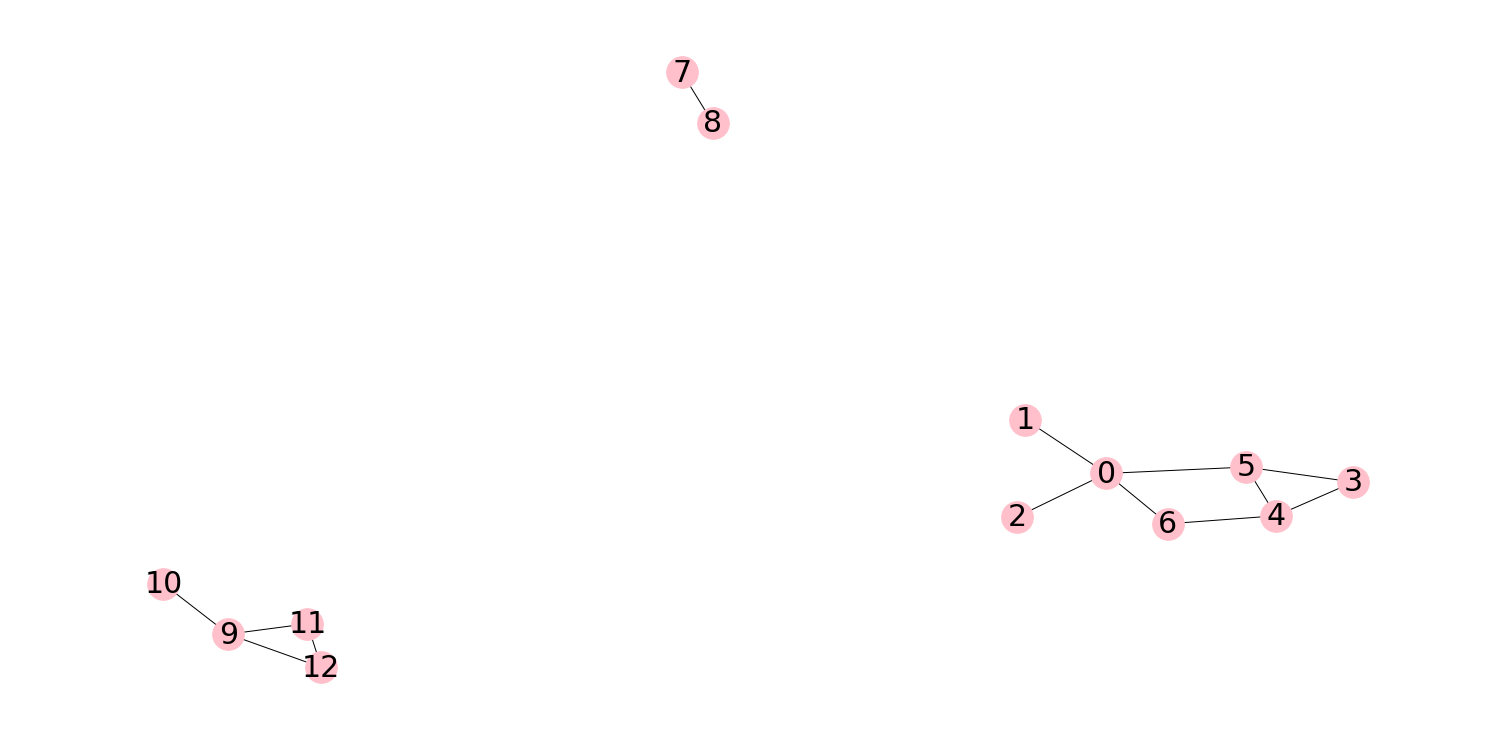

In [7]:
str_elist = """
0 6
0 2
0 1
3 5
4 5
4 6
0 5
3 4
7 8
9 11
9 10
11 12
9 12
"""
elist = [tuple(line.split(' ')) for line in str_elist.split('\n') if line != '']
G = graph(elist)
G.draw('pink')
G.info()

In [11]:
G = graph(elist)
s_name = '0'
dfs = RecursiveDepthFirstSearch(G)
dfs.dfs(s_name)
print('DFS Traversal from node {} is {}'.format(s_name, dfs.traversal))

DFS Traversal from node 0 is ['0', '6', '4', '5', '3', '2', '1']


# Connected Component

In [14]:
class CC():   
    def __init__(self, G):
        self.G = G
        self.G.reset()
        
        self.id = {}
        self.count = 0 # current component ID
        
    def CC(self):
        for node_name in self.G.node_names:
            if not self.G.nodes[node_name].visited:
                self.dfs(node_name)
                self.count += 1
        
    def dfs(self, s_name):
        self.G.nodes[s_name].visited = True
        self.id[s_name] = self.count
        
        for neighbor in self.G.nodes[s_name].neighbors:
            if not neighbor.visited:
                self.dfs(neighbor.name)

In [15]:
G = graph(elist)

compo = CC(G)
compo.CC()
compo.id

{'0': 1,
 '1': 1,
 '10': 0,
 '11': 0,
 '12': 0,
 '2': 1,
 '3': 1,
 '4': 1,
 '5': 1,
 '6': 1,
 '7': 2,
 '8': 2,
 '9': 0}